<font size="+2"><p style="text-align: center;"><b> Auswertung Versuch 232 PAP 2.1. </p></font>

## 3.2 Bestimmung der Wellenlänge

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import signal

In [2]:
plt.rc('lines', linewidth = 0.4, marker = '.', markersize = 3, markeredgewidth = 0.4)
plt.rc('errorbar', capsize = 2)

In [3]:
m = np.array([11162, 11167, 11168, 11172, 11163])
m_avg = np.mean(m)
m_error = np.sqrt(m_avg)
print('m = ', m_avg, ' +- ', m_error)

('m = ', 11166.4, ' +- ', 105.67118812618698)


In [4]:
s_a = np.array([0.000, 0.010, 0.020, 0.030, 0.040])*1e-3
s_e = np.array([2.976, 2.987, 2.995, 2.998, 3.015])*1e-3
x = s_e - s_a
x_avg = np.mean(x)
x_error = 9.0*1e-6
print('x = ', x_avg, ' +- ', x_error)

('x = ', 0.0029742, ' +- ', 9e-06)


In [5]:
lamb = 2*x_avg/m_avg
lamb_error_stat = lamb*m_error/m_avg
lamb_error_sys = lamb*x_error/x_avg
print("Wellenlaenge lambda = ", lamb, ' +- ', lamb_error_sys, ' +- ', lamb_error_stat)
print("Gesamtfehler: ", np.sqrt(lamb_error_stat**2 + lamb_error_sys**2))

('Wellenlaenge lambda = ', 5.32705258633042e-07, ' +- ', 1.6119787935234276e-09, ' +- ', 5.0411589770043414e-09)
('Gesamtfehler: ', 5.2926136702201024e-09)


In [6]:
print("sigma: ", (lamb-532*1e-9)/np.sqrt(lamb_error_stat**2 + lamb_error_sys**2 + 1e-9**2))

('sigma: ', 0.13093669572597535)


## 3.3 Bestimmung des Brechungsindex von Luft

In [7]:
p = np.array([
    [-735, -650, -595, -510, -435, -365, -285, -210, -135, -60],
    [-735, -660, -590, -510, -440, -360, -285, -205, -135, -55],
    [-735, -660, -590, -510, -435, -360, -285, -210, -130, -55]
]) + 760
p_error = np.sqrt(5**2 + 5**2)
m_p = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
T = 23.6 + 273.15
T_error = 0.5
T0 = 273.15
p0 = 760
d = 50e-3
d_error = 0.05e-3
lamb_hersteller = 532e-9
lamb_hersteller_error = 1e-9

In [8]:
def linear(x, a, b):
    return a*x + b

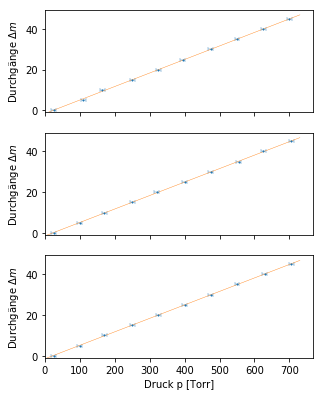

In [9]:
a = np.empty(3)
a_error = np.empty(3)
fig, ax = plt.subplots(3, 1, sharex = True, figsize = (4.8, 6.4))

for i in range(3):
    ax[i].errorbar(p[i], m_p, xerr = np.repeat(p_error, 10), linestyle = 'none')
    popt, pcov = curve_fit(linear, p[i], m_p)
    a[i] = popt[0]
    a_error[i] = np.sqrt(pcov[0][0])
    
    pressures = np.linspace(0, 730, 2)
    ax[i].plot(pressures, linear(pressures, *popt), marker = '')
    ax[i].set_xlim(left = 0)
    ax[i].set_ylim(bottom = -1)
    if i == 2:
        ax[i].set_xlabel(u'Druck p [Torr]')
    ax[i].set_ylabel(u'Durchgänge $\Delta m$')

fig.savefig('pressure_m.pdf')


In [10]:
# Durchschnittliche Steigung Delta_m / p
a_avg = np.mean(a)
a_error = np.mean(a_error)
print(a_avg, ' +- ', a_error)
a_error = 0.0004 

(0.06633084550657607, ' +- ', 0.0003375437765600544)


In [11]:
n0 = 1 + lamb_hersteller/(2*d) * a_avg * p0*T/T0
n0_error = (n0 - 1)*np.sqrt(
    (lamb_hersteller_error/lamb_hersteller)**2
    + (d_error/d)**2
    + (a_error/a_avg)**2
    + (T_error/T)**2
)
print("Brechungsindex n_0 von Luft bei Normalbedingungen: ", n0, ' +- ', n0_error)

('Brechungsindex n_0 von Luft bei Normalbedingungen: ', 1.0002913602362196, ' +- ', 1.926895241432918e-06)


## 3.4 Bestimmung der Kohärenzlänge einer Leuchtdiode

In [12]:
data=np.genfromtxt('Data_V232.csv',delimiter=",",skip_header=2)
print(data)

[[       nan  8.500e+02        nan -3.392e-02  0.000e+00        nan]
 [       nan        nan        nan -3.388e-02  0.000e+00        nan]
 [       nan        nan        nan -3.384e-02  0.000e+00        nan]
 ...
 [       nan        nan        nan  6.588e-02  1.600e-03        nan]
 [       nan        nan        nan  6.592e-02  2.400e-03        nan]
 [       nan        nan        nan  6.596e-02  1.600e-03        nan]]


In [13]:
t = data[:, 3:4] # 4.Spalte ausschneiden
t = t[:, 0] # in 1D array umwandeln
U = data[:, 4:5] # 5. Spalte ausschneiden
U = U[:, 0] # in 1D array umwandeln

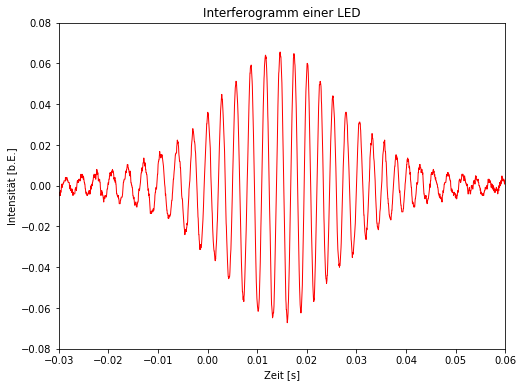

In [14]:
plt.figure(figsize=(8,6))
plt.plot(t, U, color='red', linewidth = 1, marker = '')
plt.xlabel(u'Zeit [s]')
plt.ylabel(u'Intensität [b.E.]')
plt.title('Interferogramm einer LED')
plt.axis([-0.03, 0.06, -0.08, 0.08])
plt.savefig('wellenpaket.pdf')

In [15]:
peakind = signal.find_peaks_cwt(U, np.arange(1,30),noise_perc=20)

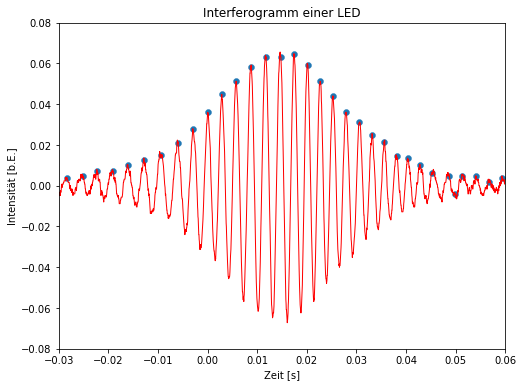

In [16]:
plt.figure(figsize=(8,6))
plt.plot(t[peakind], U[peakind], marker = 'o', markersize = 6, linestyle = 'none')
plt.plot(t, U, color='red', linewidth = 1, marker = '')
plt.xlabel('Zeit [s]')
plt.ylabel(u'Intensität [b.E.]')
plt.title(u'Interferogramm einer LED')
plt.axis([-0.03, 0.06, -0.08, 0.08])
plt.savefig('paket_indicators.pdf')

In [17]:
# Fitfunktion Gauss
def fitFunc(t, a, mu, sig):
    return a/np.sqrt(2*np.pi)/sig*np.exp(-(t-mu)**2/(2*sig**2))

In [18]:
init_vals = [0.002, 0.032, 0.015]
popt, pcov = curve_fit(fitFunc, t[peakind], U[peakind], p0=init_vals)

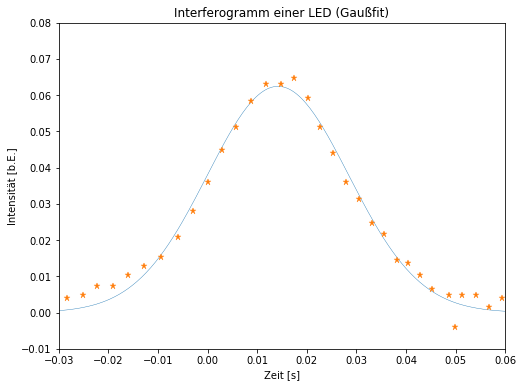

In [19]:
plt.figure(figsize=(8,6))
x = np.linspace(-0.03, 0.06, 200) # x-Werte fuer die Fitfunktion 
plt.plot(x, fitFunc(x, *popt), marker = '')
plt.plot(t[peakind], U[peakind], marker='*', markersize = 7, linewidth=0)
plt.xlabel('Zeit [s]')
plt.ylabel(u'Intensität [b.E.]')
plt.title(u'Interferogramm einer LED (Gaußfit)')
plt.axis([-0.03, 0.06, -0.01, 0.08])
plt.savefig('gaussfit.pdf')

In [20]:
print("Sigmabreite =", popt[2], "+-", np.sqrt(pcov[2][2]), "s")
print("Halbwertsbreite =", 2.355*popt[2], "+-", 2.355*np.sqrt(pcov[2][2]), "s")

('Sigmabreite =', 0.014270869423367706, '+-', 0.0002897569967000639, 's')
('Halbwertsbreite =', 0.03360789749203095, '+-', 0.0006823777272286505, 's')


In [21]:
v = 0.1e-3 # Verfahrgeschwindigkeit
l = popt[2]*v # Kohärenzlänge
l_error = l*np.sqrt(pcov[2][2])
print("Kohaerenzlaenge: ", l, '+-', l_error)

('Kohaerenzlaenge: ', 1.4270869423367707e-06, '+-', 4.1350842644137997e-10)
